In [6]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa


In [7]:
def parser(row):
    file_name = os.path.join("train_data","Crying", 'train_cry ('+ str(row) + ')'+'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0)
        #mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        #mfcc=np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs

In [8]:
def parser2(row):
    file_name = os.path.join("noise_18jul", 'noise ('+ str(row)+')' +'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0)
        #mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        #mfcc=np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs


In [9]:
def feature():
    features=np.empty((0,64))
    label=np.empty((0,1))
    
    #660-740,1-380,500-636
    #820-1276
    
     #52-80,213-240,278-300
        
    for i in range(1,1670):
        mfccs=parser2(i)
        #ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,0))
        
    for i in range(1,1387):
        mfccs=parser(i)
        #ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,1))  
    
    return features,label

In [10]:
f,l=feature()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516


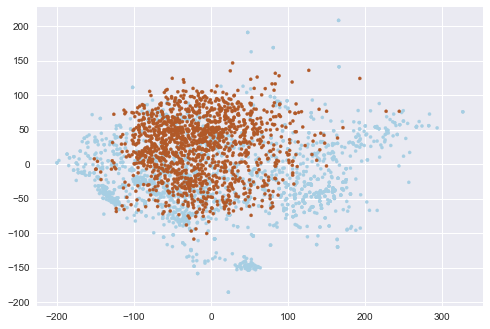

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

X=f
y=l.ravel()

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
plt.style.use("seaborn")

plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, s=10, cmap=plt.cm.Paired)

In [12]:
np.save('f_normaudio_22500_5pre_cry_noise.npy',f)
np.save('l_normaudio_22500_5pre_cry_noise.npy',l)

In [13]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

In [15]:
clf = SVC(kernel='poly',C=10,gamma=0.01, degree=3, probability=True)
clf.fit(f, l.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)
rf.fit(f, l.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [8]:
print(l.shape)

(2234, 1)


In [31]:
t, sample_rate = librosa.load('metal1.wav',sr=16000,mono=True) 

In [27]:
pre_emphasis = 2
X = np.append(t[0], t[1:] - pre_emphasis * t[:-1])
stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)

In [28]:
features_t=np.empty((0,40))
#ext_features_t = np.hstack([mfccs,chroma,mel])
features_t = np.vstack([features_t,mfccs])


In [29]:
print(l.shape)
print(l)

(2198, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [30]:
clf.predict(features_t)

array([1.])

In [26]:
def parser3(row):
    file_name = os.path.join("test_data","Noise", 'test_noise ('+ str(row)+')' + '.wav')
    try:
        
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
       
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0)
        #mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        #mfcc=np.mean(mfccs.T,axis=0)
         
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs

In [27]:
def feature_test():
    features=np.empty((0,64))
    y_test=np.empty((0,1))
    for i in range(1,137):
        mfccs=parser3(i)
        features = np.vstack([features,mfccs])
        y_test=np.vstack((y_test,0))
      
    return features,y_test

In [28]:
test_feature,y_test=feature_test()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


In [29]:
a=clf.predict(test_feature)
print(a)
#print(y_test.shape)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
for i,each in enumerate(a,start=1):
    print ("{}   {}".format(i,each))


1   0.0
2   0.0
3   1.0
4   0.0
5   0.0
6   0.0
7   0.0
8   0.0
9   0.0
10   0.0
11   0.0
12   0.0
13   0.0
14   0.0
15   0.0
16   1.0
17   1.0
18   1.0
19   0.0
20   0.0
21   0.0
22   1.0
23   1.0
24   0.0
25   1.0
26   1.0
27   0.0
28   1.0
29   0.0
30   1.0
31   0.0
32   1.0
33   0.0
34   0.0
35   0.0
36   0.0
37   1.0
38   0.0
39   0.0
40   0.0
41   1.0
42   0.0
43   0.0
44   1.0
45   0.0
46   0.0
47   0.0
48   0.0
49   0.0
50   0.0
51   1.0
52   0.0
53   0.0
54   0.0
55   0.0
56   0.0
57   0.0
58   0.0
59   0.0
60   1.0
61   0.0
62   0.0
63   1.0
64   0.0
65   0.0
66   0.0
67   0.0
68   0.0
69   0.0
70   1.0
71   0.0
72   1.0
73   0.0
74   0.0
75   0.0
76   0.0
77   0.0
78   0.0
79   0.0
80   0.0
81   0.0
82   0.0
83   0.0
84   0.0
85   0.0
86   0.0
87   0.0
88   0.0
89   0.0
90   1.0
91   0.0
92   0.0
93   1.0
94   0.0
95   0.0
96   1.0
97   1.0
98   0.0
99   1.0
100   1.0
101   1.0
102   0.0
103   0.0
104   0.0
105   0.0
106   0.0
107   0.0
108   1.0
109   0.0
110   0.0
111   0.

In [31]:
acc = clf.score(test_feature, y_test)
print("acc=%0.5f" % acc)

acc=0.77941


In [32]:
np.unique(a,return_counts=True)

(array([0., 1.]), array([106,  30], dtype=int64))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(f, l.ravel(), test_size=0.4, random_state=0)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-2,1e-1,1],'C': [10,20,5,1],'degree':[2,3]}]
                     
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('')

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print('')
    print(clf.best_params_)
    print('')
    print("Grid scores on development set:")
    print('')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print('')
    print("Detailed classification report:")
    print('')
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print('')
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')

# Tuning hyper-parameters for precision



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

Best parameters set found on development set:

{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}

Grid scores on development set:

0.800 (+/-0.014) for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.894 (+/-0.018) for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
0.564 (+/-0.490) for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.894 (+/-0.018) for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
0.463 (+/-0.487) for {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.894 (+/-0.018) for {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
0.800 (+/-0.014) for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.903 (+/-0.026) for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
0.564 (+/-0.490) for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.903 (+/-0.026) for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
0.463 (+/-0.487) for {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
0.903 (+/-0.026) for {'C': 10, 'deg

KeyboardInterrupt: 